In [3]:
%cd drive/MyDrive/DataMining/hw3

/content/drive/MyDrive/DataMining/hw3


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression



<div dir="rtl">

a)
در قسمت اول مجموعه داده در یک دیتافریم ذخیره شده است و مقادیر missing آن بررسی شده است. همان طور که مشخص است هیچ یک از دو ستون مقدار missing ندارند.

<div>

In [5]:
df = pd.read_csv('competition_awards_data.csv')
df.head()

,Awards,Math Score
0,0,43
1,0,38
2,0,41
3,0,33
4,0,39


In [6]:
df.isnull().sum()

Awards        0
Math Score    0
dtype: int64

In [7]:
df[df['Math Score']==90]

,Awards,Math Score
156,5,90
163,4,90
168,3,90
180,6,90
181,4,90


<div dir="rtl">

b)
در این قسمت نمودار پراکندگی awards برحسب math score با استفاده از تابع scatterplot رسم شده است.
<br>
همان طور که در شکل مشخص است در صورتی که مقدار Math Score از حدود 50 کمتر باشد هیچ جایزه ای به افراد تعلق نمیگیرد.
<br>
زمانی که مقدار Math Score بین 60 تا حدود 72 است یک جایزه به افراد تعلق میگیرد.
<br>
به طور کلی با افزایش مقدار Math Score تعداد جایزه ها هم افزایش میابد. اما این افزایش به صورت خطی نیست و شیب آن با افزایش Math Score افزایش میابد.
<br>
در مقادیر بزرگتر Math Score به ازای یک مقدار واحد چند مقدار Awards ثبت شده است. مثلا برای Math Score برابر با 9، 5 نقطه ی متفاوت وجود دارد.

</div>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


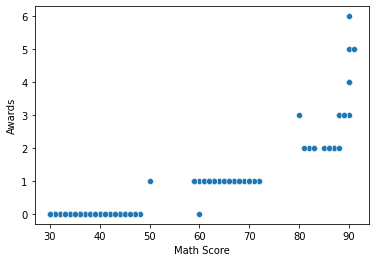

In [8]:
sns.scatterplot(df['Math Score'], df['Awards'])

<div dir="rtl">

c)
در این قسمت ابتدا متغیرهای X و y تعریف شده اند و سپس به کمک تابع train_test_split داده ی آموزش و تست جدا شده اند.

<div>

In [9]:
X = np.array(df['Math Score']).reshape(-1, 1)
y = df['Awards']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


<div dir="rtl">

d)
در این قسمت مدل PoissonRegressor ایجاد شده است و بر روی داده ی آموزشی آموزش داده شده است. در نهایت عمل پیش بینی با دستور predict روی داده ی تست انجام شده است.

<div>

In [11]:
model = PoissonRegressor()
model.fit(X_train, y_train)

PoissonRegressor()

In [12]:
y_pred = model.predict(X_test)

<div dir="rtl">

e)
در این قسمت معیار R2 با استفاده از مقدار پیش بینی شده روی داده ی تست محاسبه شده است. مقدار به دست آمده برابر 0.878 است.
<br>
R2 پراکندگی نقاط داده را در اطراف خط رگرسیون مناسب ارزیابی میکند. در این مثال مقادیر پیش بینی شده به میزان 87٪ در نزدیکی خط رگرسیون پراکنده شده اند.

<div>

In [13]:
print('R2 =', r2_score(y_test, y_pred))

R2 = 0.8983594677021441


<div dir="rtl">

f)
در این قسمت نمودار مورد نظر رسم شده است.
<br>
همان طور که مشخص است در بازه ی بین 30 تا 50 مدل به خوبی عمل کرده است. البته با افزایش مقدار Math Score در این بازه اختلاف اندکی افزایش یافته است.
<br>
در بازه ی بین 60 تا 75 مدل خیلی خوب عمل نکرده است. البته با افزایش مقدار Math Score در این بازه اختلاف رفته رفته کاهش یافته است.
<br>
در مقادیر بزرگتر Math Score مدل خیلی خوب عمل نکرده است که دلیل آن میتواند چندگانگی موجود در دیتاست برای این مقادیر باشد.

<div>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


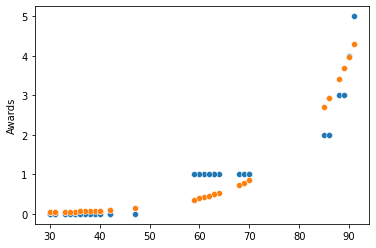

In [14]:
sns.scatterplot(X_test.reshape(-1), y_test)
sns.scatterplot(X_test.reshape(-1), y_pred)

<div dir="rtl">

g)
با توجه به اینکه متغیر پیش بین از نوع عددی شمارشی است و بازه ی محدودی دارد بهتر است که از LogesticRegression استفاده نشود و استفاده از PoissonRegressor برای این مسئله انتخاب مناسب تری است.
<br>
با توجه به این که ارتباط متغیر هدف و ویژگی از نوع خطی نیست استفاده از LogesticRegression مناسب نیست.
<br>
استفاده از LogesticRegression روی داده ی ترین همان طور که مشخص است باعث عدم همگرایی الگوریتم میشود.

<div>

In [15]:
lr = LogisticRegression(max_iter=200)

In [16]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=200)